# Analyse K-nearest neighbours

In [1]:
#import packages
import numpy as np
import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
cancer = load_breast_cancer()

# split data in training and testing
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, train_size=0.7, random_state=66)

# set the parameter of the model/classifier
number_of_neighbours = 3

clf = KNeighborsClassifier(n_neighbors=number_of_neighbours)

# training stage
clf.fit(X_train, y_train)

# prediction stage
score_test =  clf.score(X_test, y_test)

# print some output
print('K-nearest-neighbours test set score with %i neighbours is %.3f'
      %(number_of_neighbours,score_test))
print('time elapsed: %.3f [s]' % (time.time()-start))

K-nearest-neighbours test set score with 3 neighbours is 0.930
time elapsed: 0.098 [s]


### Plot confusion matrix

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[ 58   6]
 [  6 101]]
Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.06  0.94]]


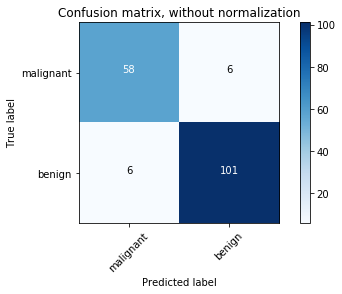

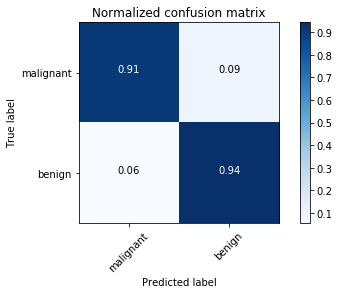

In [4]:
# predicted labels 
y_pred = clf.fit(X_train, y_train).predict(X_test)

# class names
class_names = cancer.target_names

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Plot generalization performance

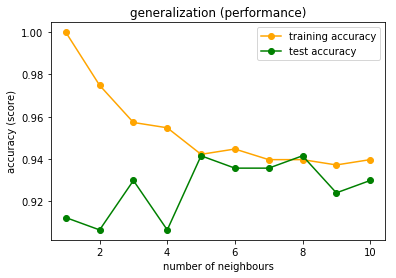

In [5]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, 'orange', marker='o', label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,'green',marker='o',label="test accuracy")
plt.legend()
plt.title('generalization (performance)')
plt.xlabel('number of neighbours')
plt.ylabel('accuracy (score)')
plt.show()